# 1 Importation des donnes

In [301]:
import pandas as pd 
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,precision_score,recall_score
import pandas_profiling
from sklearn import svm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import numpy
from sklearn.tree import DecisionTreeClassifier
import nltk
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import re 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras import layers, models, optimizers, losses, Sequential
from tensorflow.keras.layers import Dropout, SpatialDropout1D, Bidirectional, LSTM, Dense, Embedding
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers, losses, Sequential
import string
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import LatentDirichletAllocation
from keras.utils import pad_sequences
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
from sklearn import naive_bayes



In [342]:
df_val = pd.read_csv('emos_test.csv', sep=";", encoding='cp1252')


In [343]:
# load the dataset
labels, texts = [], []
df = pd.read_csv('emos_esen_nov_22.csv', sep=";", encoding='cp1252')

# shuffle the DataFrame rows (phase de test pas importenet)
df = df.sample(frac = 1)


#classer les class en pos et neg
PositifsColumn = ['admiration', 'amusement', 'annoyance',
                  'approval', 'caring', 'desire', 'excitement',
                  'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', ]


NegatifColumn = [ 'anger', 'disappointment', 'disapproval', 'disgust',
                 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']



##### Simpol rapore avec pandas profyling

In [345]:
#df.profile_report()

### Catégoriseur les label

In [347]:
#c0 pour negative 1 pour positive dans un colone labels 

NegatifColumn = [ 'anger', 'disappointment', 'annoyance',  'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']

PositifsColumn = ['admiration', 'amusement', 'approval', 'caring', 
                  'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', ]

#Label 1
df['labels'] = np.where((df[NegatifColumn[0]] == 0) & 
                       (df[NegatifColumn[1]] == 0) & 
                       (df[NegatifColumn[2]] == 0) & 
                       (df[NegatifColumn[3]] == 0) & 
                       (df[NegatifColumn[4]] == 0) & 
                       (df[NegatifColumn[5]] == 0) & 
                       (df[NegatifColumn[6]] == 0) & 
                       (df[NegatifColumn[7]] == 0) & 
                       (df[NegatifColumn[8]] == 0) &
                       (df[NegatifColumn[9]] == 0) &
                       (df[NegatifColumn[10]] == 0), 0, 1) + np.where((df[PositifsColumn[0]] == 0) & 
                       (df[PositifsColumn[0]] == 0) & 
                       (df[PositifsColumn[1]] == 0) & 
                       (df[PositifsColumn[2]] == 0) & 
                       (df[PositifsColumn[3]] == 0) & 
                       (df[PositifsColumn[4]] == 0) & 
                       (df[PositifsColumn[5]] == 0) & 
                       (df[PositifsColumn[6]] == 0) & 
                       (df[PositifsColumn[7]] == 0) & 
                       (df[PositifsColumn[8]] == 0) & 
                       (df[PositifsColumn[9]] == 0) &
                       (df[PositifsColumn[10]] == 0) &
                       (df[PositifsColumn[11]] == 0), 1, 0)

#----------------------------

#Label 1
df_val['labels'] = np.where((df_val[NegatifColumn[0]] == 0) & 
                       (df_val[NegatifColumn[1]] == 0) & 
                       (df_val[NegatifColumn[2]] == 0) & 
                       (df_val[NegatifColumn[3]] == 0) & 
                       (df_val[NegatifColumn[4]] == 0) & 
                       (df_val[NegatifColumn[5]] == 0) & 
                       (df_val[NegatifColumn[6]] == 0) & 
                       (df_val[NegatifColumn[7]] == 0) & 
                       (df_val[NegatifColumn[8]] == 0) &
                       (df_val[NegatifColumn[9]] == 0) &
                       (df_val[NegatifColumn[10]] == 0), 0, 1) + np.where((df_val[PositifsColumn[0]] == 0) & 
                       (df_val[PositifsColumn[0]] == 0) & 
                       (df_val[PositifsColumn[1]] == 0) & 
                       (df_val[PositifsColumn[2]] == 0) & 
                       (df_val[PositifsColumn[3]] == 0) & 
                       (df_val[PositifsColumn[4]] == 0) & 
                       (df_val[PositifsColumn[5]] == 0) & 
                       (df_val[PositifsColumn[6]] == 0) & 
                       (df_val[PositifsColumn[7]] == 0) & 
                       (df_val[PositifsColumn[8]] == 0) & 
                       (df_val[PositifsColumn[9]] == 0) &
                       (df_val[PositifsColumn[10]] == 0) &
                       (df_val[PositifsColumn[11]] == 0), 1, 0)



In [348]:
#Listez les labels qui n'ont pas suivi de class (Label 0)

df['labels_tout_Zero'] = np.where((df[NegatifColumn[0]] == 0) & 
                       (df[NegatifColumn[0]] == 0) & 
                       (df[NegatifColumn[1]] == 0) & 
                       (df[NegatifColumn[2]] == 0) & 
                       (df[NegatifColumn[3]] == 0) & 
                       (df[NegatifColumn[4]] == 0) & 
                       (df[NegatifColumn[5]] == 0) & 
                       (df[NegatifColumn[6]] == 0) & 
                       (df[NegatifColumn[7]] == 0) & 
                       (df[NegatifColumn[8]] == 0) &
                       (df[NegatifColumn[9]] == 0) &
                       (df[NegatifColumn[10]] == 0) &
                       (df[PositifsColumn[0]] == 0) & 
                       (df[PositifsColumn[1]] == 0) & 
                       (df[PositifsColumn[2]] == 0) & 
                       (df[PositifsColumn[3]] == 0) & 
                       (df[PositifsColumn[4]] == 0) & 
                       (df[PositifsColumn[5]] == 0) & 
                       (df[PositifsColumn[6]] == 0) & 
                       (df[PositifsColumn[7]] == 0) & 
                       (df[PositifsColumn[8]] == 0) & 
                       (df[PositifsColumn[9]] == 0) &
                       (df[PositifsColumn[10]] == 0) &
                       (df[PositifsColumn[11]] == 0), True, False)



df_val['labels_tout_Zero'] = np.where((df_val[NegatifColumn[0]] == 0) & 
                       (df_val[NegatifColumn[0]] == 0) & 
                       (df_val[NegatifColumn[1]] == 0) & 
                       (df_val[NegatifColumn[2]] == 0) & 
                       (df_val[NegatifColumn[3]] == 0) & 
                       (df_val[NegatifColumn[4]] == 0) & 
                       (df_val[NegatifColumn[5]] == 0) & 
                       (df_val[NegatifColumn[6]] == 0) & 
                       (df_val[NegatifColumn[7]] == 0) & 
                       (df_val[NegatifColumn[8]] == 0) &
                       (df_val[NegatifColumn[9]] == 0) &
                       (df_val[NegatifColumn[10]] == 0) &
                       (df_val[PositifsColumn[0]] == 0) & 
                       (df_val[PositifsColumn[1]] == 0) & 
                       (df_val[PositifsColumn[2]] == 0) & 
                       (df_val[PositifsColumn[3]] == 0) & 
                       (df_val[PositifsColumn[4]] == 0) & 
                       (df_val[PositifsColumn[5]] == 0) & 
                       (df_val[PositifsColumn[6]] == 0) & 
                       (df_val[PositifsColumn[7]] == 0) & 
                       (df_val[PositifsColumn[8]] == 0) & 
                       (df_val[PositifsColumn[9]] == 0) &
                       (df_val[PositifsColumn[10]] == 0) &
                       (df_val[PositifsColumn[11]] == 0), True, False)



In [349]:
# create a dataframe using texts and lables
df_data = pd.DataFrame()
df_data['text'] = df.text
df_data['label'] = df.labels

#Connetre les class neutre 0
df_data['labels_tout_Zero'] = df.labels_tout_Zero 

# suprimer la duplication des ling
df_data.drop_duplicates




#-------- meme pour val

# create a dataframe using texts and lables
df_data_val = pd.DataFrame()
df_data_val['text'] = df_val.text
df_data_val['label'] = df_val.labels

#Connetre les class neutre 0
df_data_val['labels_tout_Zero'] = df_val.labels_tout_Zero 

# suprimer la duplication des ling
df_data_val.drop_duplicates


<bound method DataFrame.drop_duplicates of                                                    text  label  \
0     I was never a fan of it. It should be a regula...      2   
1                           i was not prepared for this      2   
2     Given my grandpaernts survived the holocaust a...      1   
3     I would love to hear yours u/jellyjellyspace Y...      0   
4     I for one think that the military of no countr...      0   
...                                                 ...    ...   
8714  one's a rapist, and the other's a stingy yank ...      2   
8715  Ugh i wish i had seen this earlier! Have fun a...      0   
8716        It's about fucking time, hope this is real.      1   
8717  This is great! Can anyone make a request with ...      0   
8718  This is so cruel. I literally feel physically ...      2   

      labels_tout_Zero  
0                False  
1                False  
2                False  
3                False  
4                False  
...           

In [350]:
#Elimination des colone neutre(Tout Zero ou 1 pos avec 1 neg don 2)


df_data = df_data[df_data.label != 2]
df_data = df_data[df_data.labels_tout_Zero == False]

# enlever les labels Zero 
df_data.pop('labels_tout_Zero')



#---- pour val
df_data_val = df_data_val[df_data_val.label != 2]
df_data_val = df_data_val[df_data_val.labels_tout_Zero == False]

# enlever les labels Zero 
df_data_val.pop('labels_tout_Zero')


2       False
3       False
4       False
5       False
6       False
        ...  
8709    False
8713    False
8715    False
8716    False
8717    False
Name: labels_tout_Zero, Length: 5455, dtype: bool

## 2 - Data Vidualisation

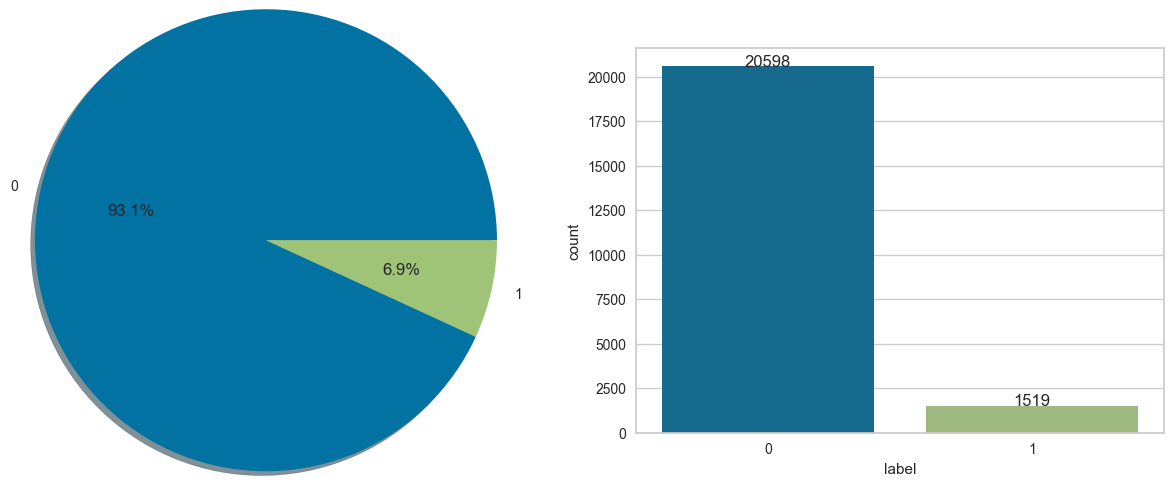

In [307]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data['label'].value_counts().index
label_count = df_data['label'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='label', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


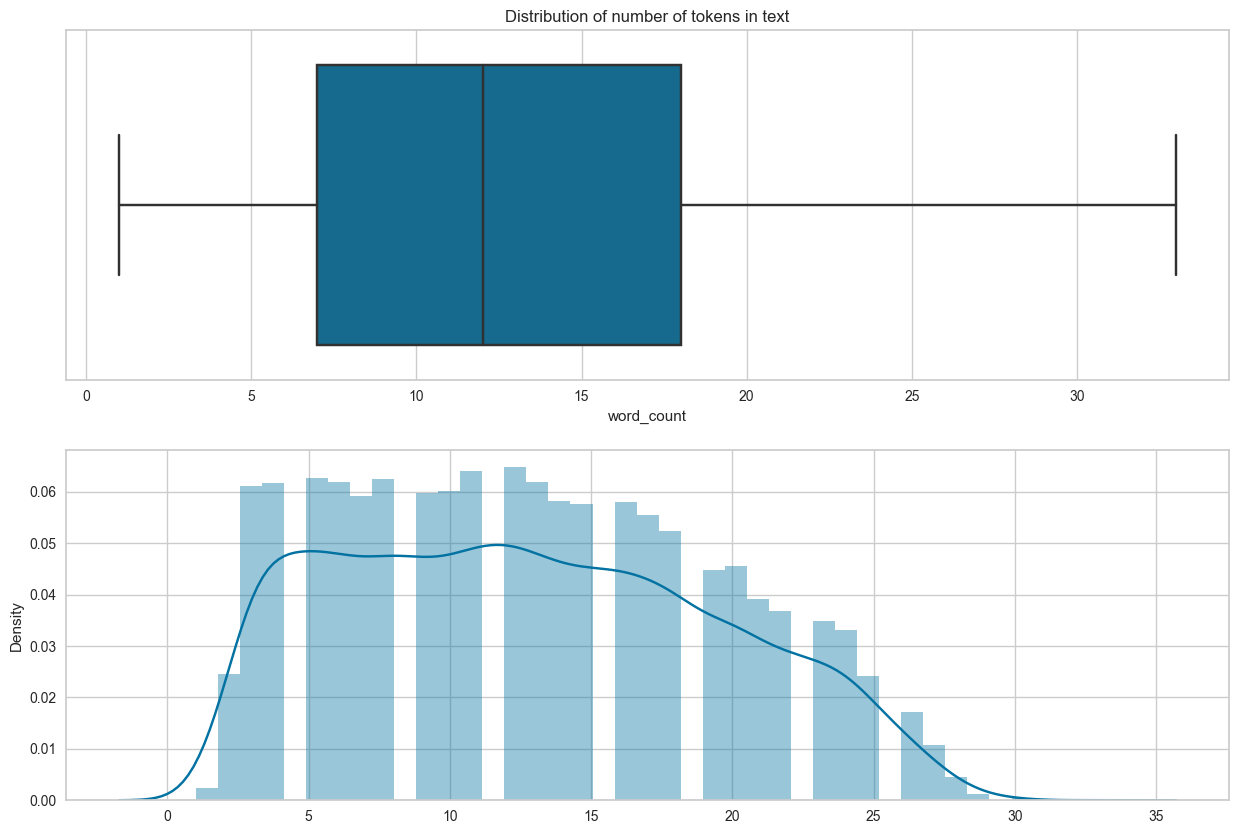

In [308]:
#Distribution of number of tokens in text
#Get the count of words in each tweet
df_data['word_count']= df_data['text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['word_count'])
plt.title(('Distribution of number of tokens in text'))

plt.subplot(2,1,2)
sns.distplot(x=df_data['word_count'])

plt.show()

## 3 - Transformation de text

In [351]:

#Stop word est Lemmatizaion Task

stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

def stop_wrds_lemma_convert(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words] #stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString + lemmatizer.lemmatize(i)+' '    #converting words to lemma                               
    return newString.strip()

df_data['text']= df_data['text'].apply(lambda x: stop_wrds_lemma_convert(x))

df_data_val['text']= df_data_val['text'].apply(lambda x: stop_wrds_lemma_convert(x))



In [352]:
# Transformation de text

import re

#Remove hashtags from the text
df_data['text']=df_data['text'].apply(lambda x: re.sub('#','',x))
df_data_val['text']=df_data_val['text'].apply(lambda x: re.sub('#','',x))

#Remove links/urls from the text
df_data['text']=df_data['text'].apply(lambda x: re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?','',x))

df_data_val['text']=df_data_val['text'].apply(lambda x: re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?','',x))



In [353]:
# Handle Missing Values

def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    return df

trainDF = impute(df_data)
df_val = impute(df_data_val)

In [357]:


# split the dataset into training and validation datasets 
#train_x, valid_x, train_y, valid_y = train_test_split(trainDF['text'], trainDF['label'])

train_x = trainDF['text'] 
valid_x = df_val['text']
train_y = trainDF['label'] 
valid_y = df_val['label']




#### Count Vectors as features

In [358]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)


##### 2.2 TF-IDF Vectors as features


In [359]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:554: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


#### Word Embeddings

In [360]:
# load the pre-trained word-embedding vectors crawl-300d-2M 
embeddings_index = {}
for i, line in enumerate(open('crawl-300d-2M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')





In [361]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index


In [362]:
# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#### Text / NLP based features

###### Test simple pour eseyes un bon pronostic

In [363]:

trainDF['char_count'] = trainDF['text'].apply(len)
trainDF['word_count'] = trainDF['text'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))




In [364]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

trainDF['noun_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['text'].apply(lambda x: check_pos_tag(x, 'pron'))



In [365]:
# train a LDA Model 
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)

topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    
## nous n'avons pas utilisé

/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 4 - Model Building

In [366]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    if is_neural_net:
        classifier.fit(feature_vector_train, label, epochs=10)
    else:
        # fit the training dataset on the classifier
        classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.classification_report(predictions, valid_y)



#### Naive Bayes


In [367]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("Count Vectors:")
print(accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("WordLevel TF-IDF:")
print(accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("N-Gram Vectors:")
print(accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("CharLevel Vectors:")
print(accuracy)



Count Vectors:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5410
           1       0.03      0.27      0.06        45

    accuracy                           0.93      5455
   macro avg       0.51      0.60      0.51      5455
weighted avg       0.99      0.93      0.96      5455

WordLevel TF-IDF:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      5455
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5455
   macro avg       0.50      0.47      0.48      5455
weighted avg       1.00      0.93      0.97      5455

N-Gram Vectors:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      5446
           1       0.01      0.56      0.03         9

    accuracy                           0.93      5455
   macro avg       0.51      0.74      0.50      5455
weighted avg       1.00  

/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/

##### Linear Classifier

In [326]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ")
print(accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ")
print(accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ")
print(accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ")
print(accuracy)



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR, Count Vectors: 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5405
           1       0.15      0.45      0.23       125

    accuracy                           0.93      5530
   macro avg       0.57      0.69      0.59      5530
weighted avg       0.97      0.93      0.95      5530

LR, WordLevel TF-IDF: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5499
           1       0.04      0.42      0.06        31

    accuracy                           0.93      5530
   macro avg       0.52      0.68      0.51      5530
weighted avg       0.99      0.93      0.96      5530

LR, N-Gram Vectors: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5518
           1       0.01      0.33      0.02        12

    accuracy                           0.93      5530
   macro avg       0.50      0.63      0.49      5530
weighted a

#### KNeighborsClassifier

In [327]:
# Linear Classifier on Count Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=8), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=8), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(KNeighborsClassifier(n_neighbors=8), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model( KNeighborsClassifier(n_neighbors=8), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)


/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR, Count Vectors:                precision    recall  f1-score   support

           0       1.00      0.93      0.97      5530
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5530
   macro avg       0.50      0.47      0.48      5530
weighted avg       1.00      0.93      0.97      5530

LR, WordLevel TF-IDF:                precision    recall  f1-score   support

           0       1.00      0.93      0.97      5529
           1       0.00      0.00      0.00         1

    accuracy                           0.93      5530
   macro avg       0.50      0.47      0.48      5530
weighted avg       1.00      0.93      0.97      5530

LR, N-Gram Vectors:                precision    recall  f1-score   support

           0       1.00      0.93      0.97      5526
           1       0.01      0.75      0.02         4

    accuracy                           0.93      5530
   macro avg       0.50      0.84      0.49      5530
weighted a

#### DecisionTreeClassifier

In [328]:
clf = DecisionTreeClassifier(random_state=0)

# Linear Classifier on Count Vectors
accuracy = train_model(DecisionTreeClassifier(random_state=0), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(DecisionTreeClassifier(random_state=0), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(DecisionTreeClassifier(random_state=0), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(DecisionTreeClassifier(random_state=0), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)


LR, Count Vectors:                precision    recall  f1-score   support

           0       0.96      0.95      0.95      5230
           1       0.26      0.32      0.29       300

    accuracy                           0.91      5530
   macro avg       0.61      0.63      0.62      5530
weighted avg       0.92      0.91      0.92      5530

LR, WordLevel TF-IDF:                precision    recall  f1-score   support

           0       0.95      0.95      0.95      5173
           1       0.26      0.27      0.27       357

    accuracy                           0.90      5530
   macro avg       0.61      0.61      0.61      5530
weighted avg       0.91      0.90      0.90      5530

LR, N-Gram Vectors:                precision    recall  f1-score   support

           0       0.97      0.94      0.96      5335
           1       0.15      0.28      0.19       195

    accuracy                           0.92      5530
   macro avg       0.56      0.61      0.57      5530
weighted a

##### Implementing a SVM Model

In [329]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)




SVM, N-Gram Vectors:                precision    recall  f1-score   support

           0       1.00      0.94      0.96      5495
           1       0.04      0.46      0.08        35

    accuracy                           0.93      5530
   macro avg       0.52      0.70      0.52      5530
weighted avg       0.99      0.93      0.96      5530



####  Bagging Model


In [368]:
# RF on Count Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)


RF, Count Vectors:                precision    recall  f1-score   support

           0       0.98      0.94      0.96      5323
           1       0.12      0.33      0.17       132

    accuracy                           0.92      5455
   macro avg       0.55      0.63      0.57      5455
weighted avg       0.96      0.92      0.94      5455

RF, WordLevel TF-IDF:                precision    recall  f1-score   support

           0       0.98      0.94      0.96      5313
           1       0.14      0.35      0.20       142

    accuracy                           0.93      5455
   macro avg       0.56      0.65      0.58      5455
weighted avg       0.96      0.93      0.94      5455



In [369]:

# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy * 100, "%")

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy * 100, "%")

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy * 100, "%")

# Extereme Gradient Boosting on ngram Level TF IDF Vectors
accuracy = train_model(xgb.XGBClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("Xgb, ngram Vectors: ", accuracy * 100, "%")


Xgb, Count Vectors:                precision    recall  f1-score   support

           0       0.99      0.94      0.96      5390
           1       0.08      0.43      0.13        65

    accuracy                           0.93      5455
   macro avg       0.53      0.68      0.55      5455
weighted avg       0.98      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5390
           1       0.08      0.43      0.13        65

    accuracy                           0.93      5455
   macro avg       0.53      0.68      0.55      5455
weighted avg       0.98      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5390
           1       0.08      0.43      0.13        65

    accuracy                           0.93      5455
   macro avg       0.53      0.68      0.55      5455
weighted avg       0.98      0.93      0.95      5455
 

Xgb, WordLevel TF-IDF:                precision    recall  f1-score   support

           0       0.99      0.94      0.96      5380
           1       0.10      0.48      0.16        75

    accuracy                           0.93      5455
   macro avg       0.55      0.71      0.56      5455
weighted avg       0.98      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5380
           1       0.10      0.48      0.16        75

    accuracy                           0.93      5455
   macro avg       0.55      0.71      0.56      5455
weighted avg       0.98      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5380
           1       0.10      0.48      0.16        75

    accuracy                           0.93      5455
   macro avg       0.55      0.71      0.56      5455
weighted avg       0.98      0.93      0.95      545

Xgb, CharLevel Vectors:                precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      54

Xgb, ngram Vectors:                precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      5455
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5355
           1       0.12      0.45      0.19       100

    accuracy                           0.93      5455
   macro avg       0.56      0.69      0.58      5455
weighted avg       0.97      0.93      0.95      5455
 

#### Recurrent Neural Network – LSTM

In [370]:
def create_LSTM():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_LSTM()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-LSTM, Word Embeddings",  accuracy)


Epoch 1/10


2022-11-20 14:24:44.757987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 14:24:44.976026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 14:24:45.337682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


692/692 [==============================] - 17s 23ms/step - loss: 0.2387
Epoch 2/10
692/692 [==============================] - 15s 21ms/step - loss: 0.2040
Epoch 3/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1921
Epoch 4/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1856
Epoch 5/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1801
Epoch 6/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1724
Epoch 7/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1637
Epoch 8/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1536
Epoch 9/10
692/692 [==============================] - 15s 21ms/step - loss: 0.1381
Epoch 10/10
  1/171 [..............................] - ETA: 41s

2022-11-20 14:27:13.015498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 14:27:13.052338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


171/171 [==============================] - 2s 11ms/step
RNN-LSTM, Word Embeddings               precision    recall  f1-score   support

           0       1.00      0.93      0.97      5455
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5455
   macro avg       0.50      0.47      0.48      5455
weighted avg       1.00      0.93      0.97      5455



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recurrent Neural Network – GRU

In [333]:
def create_rnn_gru():
 # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-GRU, Word Embeddings",  accuracy)



Epoch 1/10


2022-11-20 08:54:02.684261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:54:02.816275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:54:03.262156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


519/519 [==============================] - 33s 24ms/step - loss: 0.2459
Epoch 2/10
519/519 [==============================] - 12s 23ms/step - loss: 0.2050
Epoch 3/10
519/519 [==============================] - 12s 24ms/step - loss: 0.1959
Epoch 4/10
519/519 [==============================] - 12s 24ms/step - loss: 0.1881
Epoch 5/10
519/519 [==============================] - 12s 23ms/step - loss: 0.1827
Epoch 6/10
519/519 [==============================] - 12s 23ms/step - loss: 0.1766
Epoch 7/10
519/519 [==============================] - 12s 23ms/step - loss: 0.1678
Epoch 8/10
519/519 [==============================] - 12s 24ms/step - loss: 0.1573
Epoch 9/10
519/519 [==============================] - 12s 24ms/step - loss: 0.1523
Epoch 10/10
  1/173 [..............................] - ETA: 40s

2022-11-20 08:56:06.073959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:56:06.106246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


173/173 [==============================] - 2s 10ms/step
RNN-GRU, Word Embeddings               precision    recall  f1-score   support

           0       1.00      0.93      0.97      5530
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5530
   macro avg       0.50      0.47      0.48      5530
weighted avg       1.00      0.93      0.97      5530



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bidirectional RNN

In [334]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))
    
    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("RNN-Bidirectional, Word Embeddings",  accuracy)



Epoch 1/10


2022-11-20 08:56:08.881899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:56:09.053886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:56:09.064621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:56:09.309947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:56:09.324625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


519/519 [==============================] - 23s 42ms/step - loss: 0.2442
Epoch 2/10
519/519 [==============================] - 22s 41ms/step - loss: 0.2041
Epoch 3/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1942
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1892
Epoch 5/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1825
Epoch 6/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1727
Epoch 7/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1667
Epoch 8/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1613
Epoch 9/10
519/519 [==============================] - 21s 41ms/step - loss: 0.1485
Epoch 10/10
519/519 [==============================] - 22s 41ms/step - loss: 0.1362


2022-11-20 08:59:44.079055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:59:44.131145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 08:59:44.139512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


173/173 [==============================] - 4s 19ms/step
RNN-Bidirectional, Word Embeddings               precision    recall  f1-score   support

           0       1.00      0.93      0.97      5530
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5530
   macro avg       0.50      0.47      0.48      5530
weighted avg       1.00      0.93      0.97      5530



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Recurrent Convolutional Neural Network

In [335]:
  def create_rcnn():  
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)



Epoch 1/10
  5/519 [..............................] - ETA: 6s - loss: 0.4734  

2022-11-20 08:59:48.129021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


519/519 [==============================] - 6s 11ms/step - loss: 0.2450
Epoch 2/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1999
Epoch 3/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1803
Epoch 4/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1574
Epoch 5/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1409
Epoch 6/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1195
Epoch 7/10
519/519 [==============================] - 6s 11ms/step - loss: 0.1058
Epoch 8/10
519/519 [==============================] - 6s 11ms/step - loss: 0.0956
Epoch 9/10
519/519 [==============================] - 6s 11ms/step - loss: 0.0831
Epoch 10/10
 32/173 [====>.........................] - ETA: 0s

2022-11-20 09:00:45.002218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


173/173 [==============================] - 1s 7ms/step
CNN, Word Embeddings               precision    recall  f1-score   support

           0       1.00      0.93      0.97      5530
           1       0.00      0.00      0.00         0

    accuracy                           0.93      5530
   macro avg       0.50      0.47      0.48      5530
weighted avg       1.00      0.93      0.97      5530



/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khaledihitt/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion

La plupart des algorithmes d'apprentissage deep learning mettent un surajustement pré 10 epoc, alors nous avons conclu que le problème est que les données ne son pas équilibrées en termes de classe (le coût de l'étiquette 0 prend la majorité) .
Donc dans notre cas le meilleur résultat est d'obtenir avec un modèle de machine Leurning.
